# 파이썬 활용 디지털마케팅 데이터분석 및 기획

# Today's mission

- 예측 모델링 개요  
- 문제 정의 및 가설 설정  
  (가설 및 목적, 예상 결과)
- 분석 프레임  
  (모델링 프로세스, 로직 트리)
- 데이터 불러오기  
  (파일 읽기, 컬럼 정보, 색인)
- 데이터 전처리 및 분석  
  (결측치 처리, 이상치 처리, 분포 변환, 단위 변환, 전처리 실습)
- 모델 생성 및 모델 평가  
  (모델 구축 프로세스, Cross Validation, Grid Search, 평가 메트릭)
- 모델 성능 개선 및 결과 토론  
  (변수 스케일링 및 분포 변환, Feasure Selection, Model Selection)

]

## Day04-4A  예측 모델링 (실습) - 모델 생성 및 모델 평가

### 모델 구축 프로세스

- 모델 생성 및 모델 평가  
  (모델 구축 프로세스, Cross Validation, Grid Search, 평가 메트릭)
- 모델 성능 개선 및 결과 토론  
  (변수 스케일링 및 분포 변환, Feasure Selection, Model Selection)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 5
np.set_printoptions(precision=3)

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-paper')

**목차**
1. Read the dataset (after extracting)
2. Preprocessing
3. EDA
4. Modeling
5. Evaluation

### 파일 읽기

In [3]:
df5 = pd.read_csv("data/testset3.csv", index_col=0)
df5

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
iduser,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3504812.0,0
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,0.0,17123098.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10100022150627,18.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,9.0,0.0,53352144.0,0
10100021804275,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,95232.0,0


### 분류 모델 종류
 - **Logistic Regression**
     - Logistic regression fits a logistic model to data and makes predictions about the probability of an event (between 0 and 
 - **Naive Bayes**
    - Naive Bayes uses Bayes Theorem to model the conditional relationship of each attribute to the class variable
 - **k-Nearest Neighbor**
    - The k-Nearest Neighbor (kNN) method makes predictions by locating similar cases to a given data instance (using a similarity function) and returning the average or majority of the most similar data instances. The kNN algorithm can be used for classification or regression.
 - **Trees-based model**
    - Classification and Regression Trees (CART) are constructed from a dataset by making splits that best separate the data for the classes or predictions being made. The CART algorithm can be used for classification or regression
 - **Random Forest**
    - Random Forest is a machine learning algorithm used for classification, regression, and feature selection. It's an ensemble technique, meaning it combines the output of one weaker technique in order to get a stronger result. The weaker technique in this case is a decision tree. Decision trees work by splitting the and re-splitting the data by features. If a decision tree is split along good features, it can give a decent predictive output    
 - **SVM (Support Vector Machines)**
    - Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups. Classification for multiple classes is supported by a one-vs-all method. SVM also supports regression by modeling the function with a minimum amount of allowable error

### Cross Validation
- 모델 구축 후 성능 검증을 위해 전체 Dataset을 Train, Validation과 Test로 나눈다. 
- Testset은 최적화된 파라메터로 구축된 최종 모델의 성능을 파악하기 위해 단 1회만 사용한다. 
- 최적화 파라메터는 Scikit-learn에서 제공하는 grid_serach를 이용해 구한다.
- Dataset을 나눌 때 test_size 옵션으로 Train, Test의 비율을 설정할 수 있고, random_state로 seed 값을 지정할 수 있다.
- 데이터 샘플이 너무 많다면, 연상 비용이 크게 증가할 수 있어 샘플링이 필요하다.

```python
# 샘플링 예시 코드 / frac에는 샘플링셋의 비율을 입력, Replace는 비복원으로 지정(False)
df_sampled = df.sample(frac=.1, replace=False) 
```


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [5]:
# set ind vars and target var
X = df5.drop('group', axis=1)
y = df5.group

# split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scaling
scaler = MinMaxScaler()

# fit_transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [7]:
# max
print(X_train_scaled.max(axis=0))
print(X_test_scaled.max(axis=0))
print(' ')
# min
print(X_train_scaled.min(axis=0))
print(X_test_scaled.min(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(115566, 11)
(115566,)
(38523, 11)
(38523,)


## Day04-4B 예측 모델링 (실습) - 모델 파라메터 설정
- 기본 모델: **Logistic Regression** 
    - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- 주요 파라메터 (C)
    - C 값 (기본값 = 1)
    - C 값이 작으면 Penalty 강해짐 (단순 모델)
    - C 값이 크면 Penalty 약해짐 (정규화 없어짐)
    - 보통 로그스케일로 지정(10배씩) = 0.01, 0.1, 1, 10
- penalty
    - L2: Ridge, 일반적으로 사용 (default)
    - L1: LASSO, 변수가 많아서 줄여야할 때 사용, 모델의 단순화 및 해석에 용이

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# set params
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# fit
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

**How the grid_search module works:**
```python

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# SET default
best_score = 0

# iterataion
for r in ['l1', 'l2']:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        lm = LogisticRegression(penalty = r, C=C)
        scores = cross_val_score(lm, X_train, y_train, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'penalty': r}
            
```            

In [10]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'C': 0.001, 'penalty': 'l2'}
0.9661578667898866
LogisticRegression(C=0.001)


In [11]:
grid_search.score(X_test_scaled, y_test) # accuracy

0.9687978610180931

In [12]:
grid_search.predict(X_test_scaled)

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
print(len(grid_search.predict(X_test_scaled)))
print(len(y_test))

38523
38523


### 1차 모델 평가 (about the first model)

In [14]:
print('when grid searching: ', grid_search.best_score_)
print('at the trainset:, ', grid_search.score(X_test_scaled, y_test))

when grid searching:  0.9661578667898866
at the trainset:,  0.9687978610180931


In [15]:
# 실제 테스트셋의 label 분포
y_test.value_counts()

group
0    37321
1     1202
Name: count, dtype: int64

In [16]:
# 모델 예측 결과
pd.Series(grid_search.predict(X_test_scaled)).value_counts()

0    38523
Name: count, dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(grid_search.predict(X_test), y_test))

[[34216  1173]
 [ 3105    29]]


In [18]:
from sklearn.metrics import classification_report

print(classification_report(grid_search.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     35389
           1       0.02      0.01      0.01      3134

    accuracy                           0.89     38523
   macro avg       0.47      0.49      0.48     38523
weighted avg       0.84      0.89      0.87     38523



Text(0.5, 0, 'False Positive Rate')

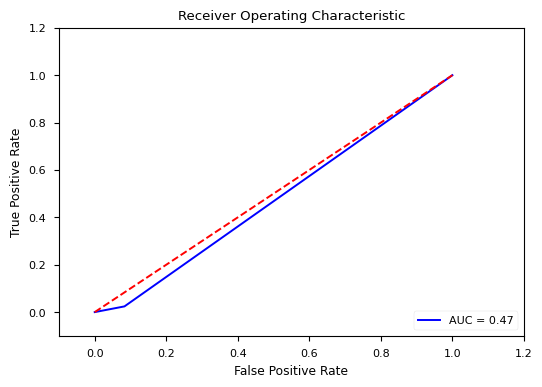

In [19]:
# ROC plot
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Upsampling & Downsampling for imbalanced data
1. Collect More Data (if possible)
2. Resampling the Dataset
    - oversampling
        - no information loss, perform better than undersampling
        - overfitting issues (because of duplicates)
    - undersampling
        - help improve run time and storage problems
        - information loss, biased dataset
3. Generate Synthetic Samples

In [20]:
# orginal dataset
df5.group.value_counts()

group
0    148976
1      5113
Name: count, dtype: int64

In [21]:
df5.group.value_counts().transform(lambda x: x / x.sum())

group
0    0.966818
1    0.033182
Name: count, dtype: float64

In [22]:
def oversampling(df):    

    df_pay_only = df.query("group == 1")
    df_pay_only_over = pd.concat([df_pay_only, df_pay_only, df_pay_only], axis=0) 
    df_over = pd.concat([df, df_pay_only_over], axis=0)

    return df_over

In [23]:
df5_over = oversampling(df5)

In [24]:
df5_over.group.value_counts().transform(lambda x: x / x.sum())

group
0    0.879288
1    0.120712
Name: count, dtype: float64

In [25]:
X = df5_over.drop("group", axis=1)
y = df5_over.group

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [26]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(127071, 11)
(127071,)
(42357, 11)
(42357,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# set params
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# fit
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [28]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'C': 10, 'penalty': 'l2'}
0.9192262764078368
LogisticRegression(C=10)


In [29]:
print(grid_search.score(X_test_scaled, y_test))

0.9205090067757395


In [30]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(grid_search.predict(X_test_scaled), y_test))

[[36467  2556]
 [  811  2523]]


In [31]:
from sklearn.metrics import classification_report

print(classification_report(grid_search.predict(X_test_scaled), y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     39023
           1       0.50      0.76      0.60      3334

    accuracy                           0.92     42357
   macro avg       0.74      0.85      0.78     42357
weighted avg       0.94      0.92      0.93     42357



Text(0.5, 0, 'False Positive Rate')

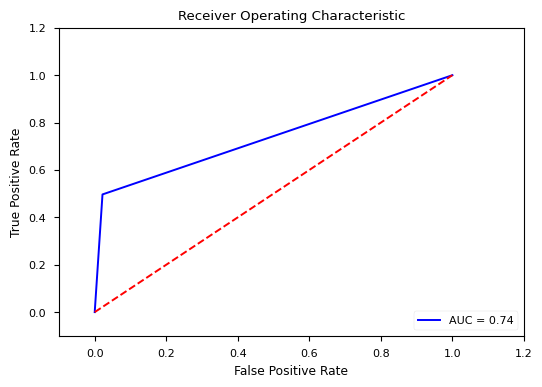

In [32]:
# ROC plot
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test_scaled))
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### The model performance of the first application
- process
    - oversampling
    - dataset split
    - minmax scale
    - logistic regression, grid search, k-fold(5)
    - evaluation
    - Baseline score: **Precision: 0.5, Recall: 0.76, AUC: 0.74**
- How to improve
    - **There seems no overfitting issues**
        - how to avoid overfitting: collect more data
            - regularization
            - feature deduction
            - collect more samples
    - **Feature Engineering**
        - Other Scaling and Transformation
        - Feature selection or creation
            - Polynomial / Interactions
            - new features
        - Transformation
            - log, exp, sqrt (if not tree-based model)
            - Numeric to Categorical
    - **Model, Parameter Tuning**
        - KNN
        - NB
        - SVM
        - RF
        - NN .. any classification models


### How to Improve
- scale
- distribution transformation
- apply other models

### Change Scale to z-score & pipeline

In [33]:
df5_over.head() # after removes outliers

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
iduser,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3504812.0,0
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,0.0,17123098.0,0
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2234363.0,0
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,812475.0,0
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,0.0,4307703.0,0


In [34]:
X_train.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic
iduser,,,,,,,,,,,
10100008873531,17.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,57282542.0
10100002534050,28.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,14.0,0.0,24223450.0
10100036517560,36.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,10.0,2.0,45424551.0
10100013746186,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,50312.0
10100000598189,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0


In [35]:
y_train.head()

iduser
10100008873531    1
10100002534050    1
10100036517560    0
10100013746186    0
10100000598189    0
Name: group, dtype: int64

In [36]:
from sklearn.pipeline import Pipeline

def pipeline_logit(X_train, y_train):

    scaler = StandardScaler()
    logit_model = LogisticRegression()

    pipe = Pipeline([('scaler', scaler), ('model', logit_model)])

    param_grid = [{'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'model__penalty': ['l1', 'l2']}]

    grid_search = GridSearchCV(pipe, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [37]:
grid_search = pipeline_logit(X_train, y_train)

In [38]:
print("best score: ", grid_search.best_score_)
print("best score: ", grid_search.best_params_)

best score:  0.9193836674932641
best score:  {'model__C': 1, 'model__penalty': 'l2'}


In [39]:
print(classification_report(grid_search.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     39002
           1       0.50      0.76      0.60      3355

    accuracy                           0.92     42357
   macro avg       0.74      0.85      0.78     42357
weighted avg       0.94      0.92      0.93     42357



In [40]:
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(fpr, tpr)

print(roc_auc)

0.7396771284111806


### Transfrom Distribution

In [41]:
df5_over.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
count,169428.000000,169428.000000,169428.000000,169428.000000,169428.00000,169428.000000,169428.00000,169428.000000,169428.000000,169428.000000,1.694280e+05,169428.000000
mean,20.564157,0.851306,0.038506,0.612962,8.43484,0.007744,0.02535,0.078458,10.205238,1.455061,1.675352e+07,0.120712
...,...,...,...,...,...,...,...,...,...,...,...,...
75%,27.000000,0.000000,0.000000,0.000000,13.00000,0.000000,0.00000,0.000000,14.000000,0.000000,1.621829e+07,0.000000
max,135.000000,60.000000,1.000000,27.000000,336.00000,2.000000,115.00000,6.000000,30.000000,52.000000,4.263385e+08,1.000000


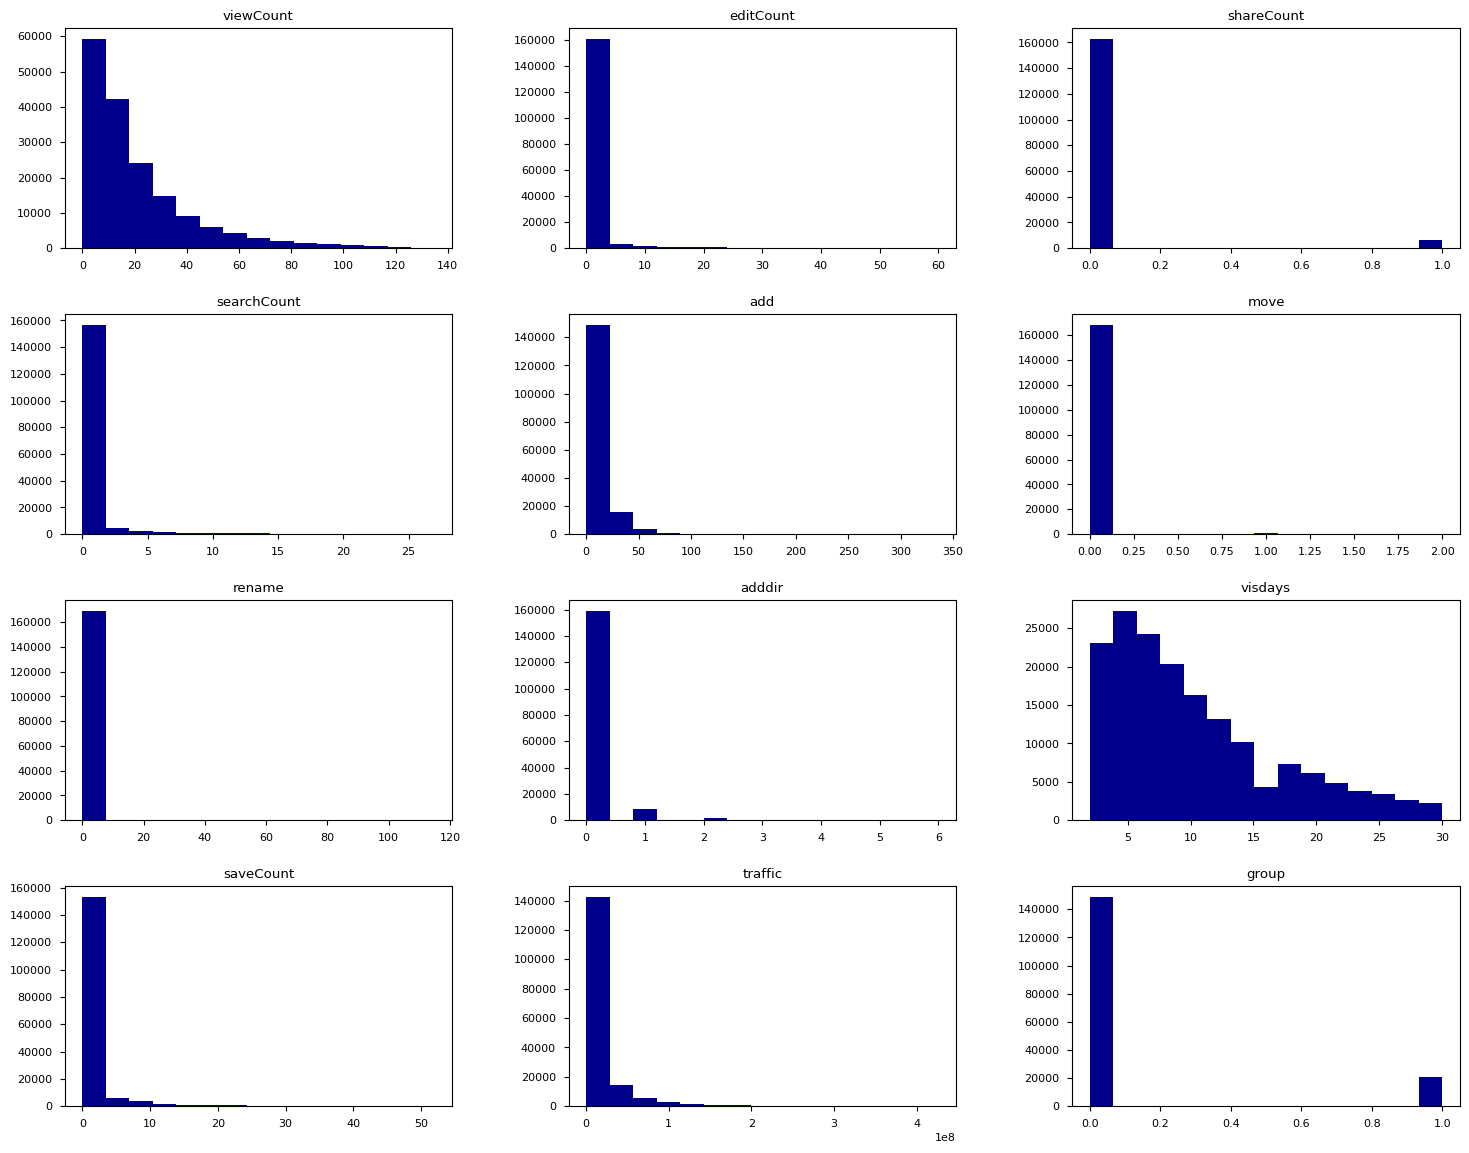

In [42]:
df5_over.hist(bins=15, color='darkblue', figsize=(18,14), grid=False);

In [43]:
df5_over_log = df5_over.loc[:,:'traffic'].apply(lambda x: np.log(x + 1)).join(df5_over['group'])

In [44]:
df5_over_log.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
count,230784.000000,230784.000000,230784.000000,230784.000000,230784.000000,230784.000000,230784.000000,230784.000000,230784.000000,230784.000000,230784.000000,230784.000000
mean,2.649576,0.332377,0.035921,0.360784,1.052926,0.007913,0.017363,0.054398,2.394406,0.543058,13.968064,0.354479
...,...,...,...,...,...,...,...,...,...,...,...,...
75%,3.332205,0.000000,0.000000,0.000000,2.639057,0.000000,0.000000,0.000000,2.944439,0.693147,16.605978,1.000000
max,4.912655,4.110874,0.693147,3.332205,5.820083,1.098612,4.753590,1.945910,3.433987,3.970292,19.870744,1.000000


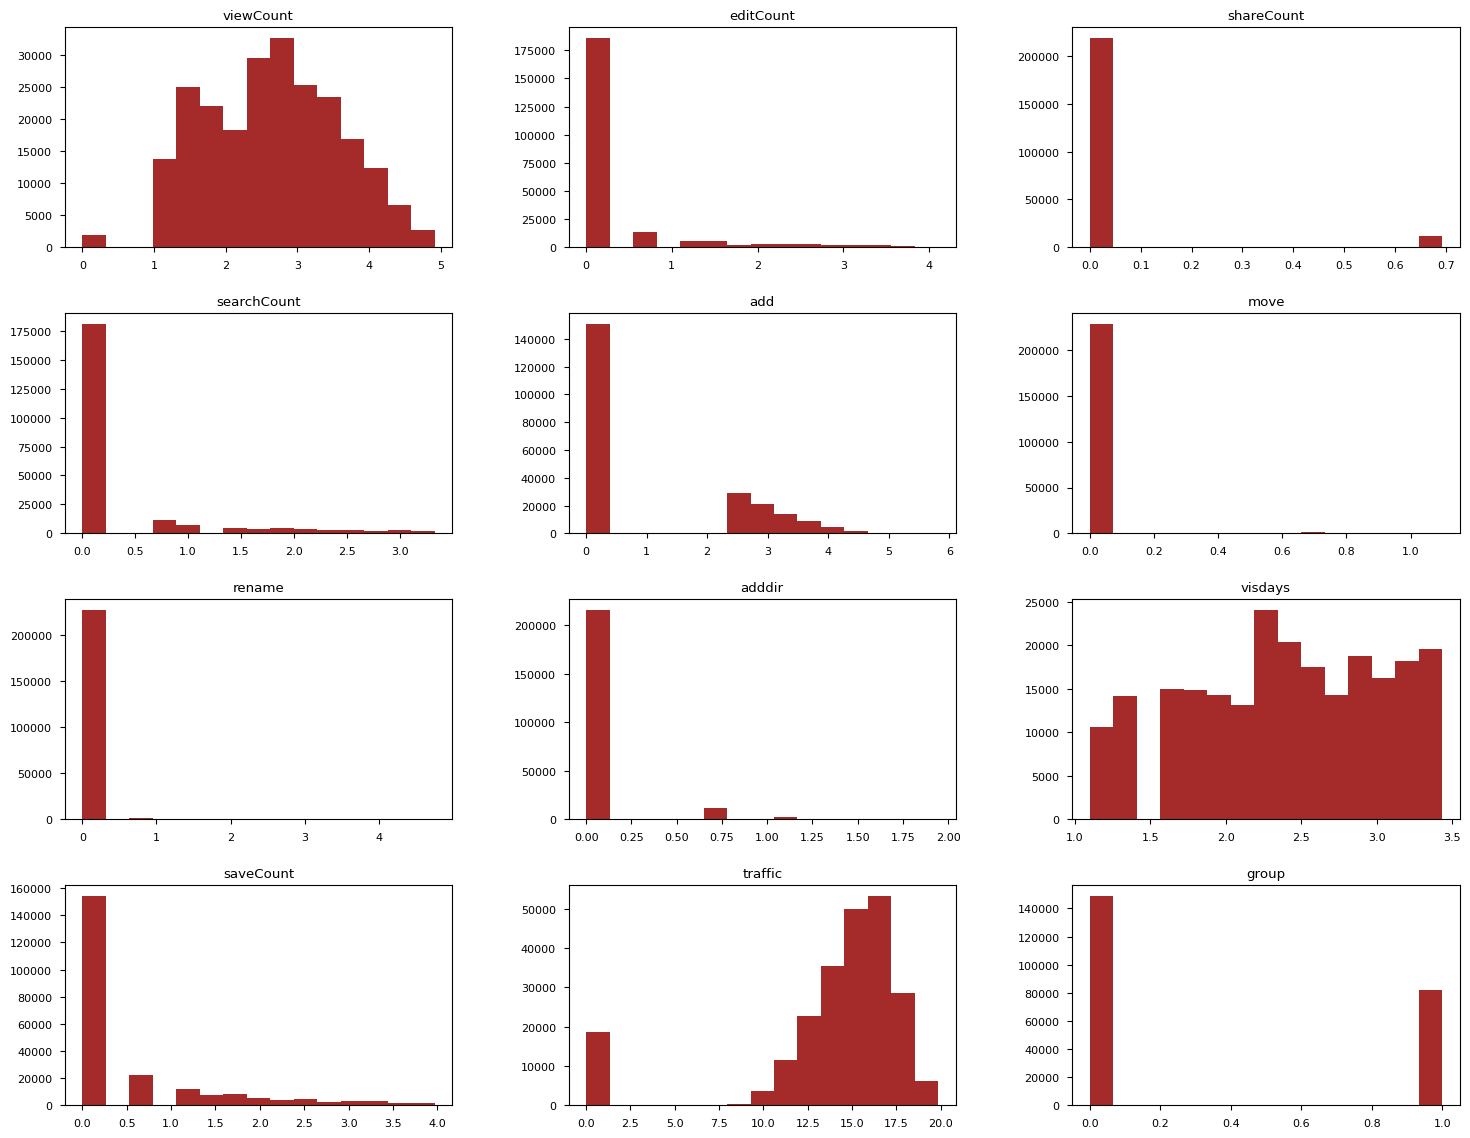

In [45]:
df5_over_log.hist(bins=15, color='brown', figsize=(18,14), grid=False);

In [46]:
X = df5_over_log.drop("group", axis=1)
y = df5_over_log.group

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
grid_search = pipeline_logit(X_train, y_train)

In [48]:
def evaluation(grid, X_test, y_test):
    
    print(classification_report(grid.predict(X_test), y_test))

    print("best score: ", grid.best_score_)
    print("best params: ", grid.best_params_)

    fpr, tpr, thresholds = roc_curve(y_test, grid.predict(X_test))
    roc_auc = auc(fpr, tpr)
    
    return roc_auc

In [49]:
evaluation(grid_search, X_test, y_test)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     39709
           1       0.77      0.89      0.83     17987

    accuracy                           0.88     57696
   macro avg       0.86      0.89      0.87     57696
weighted avg       0.89      0.88      0.89     57696

best score:  0.8849486878485056
best params:  {'model__C': 1, 'model__penalty': 'l2'}


0.8604390457887563

Text(0.5, 0, 'False Positive Rate')

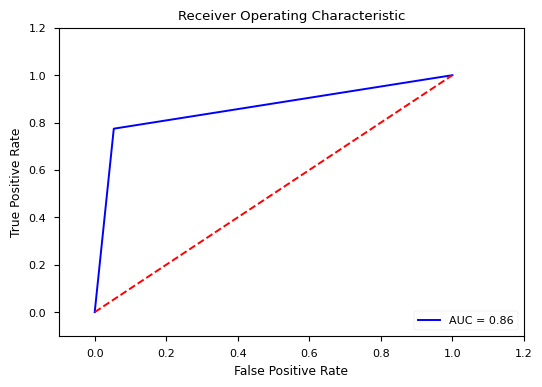

In [50]:
# ROC plot
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

- The current score: **Precision: 0.77, Recall: 0.88, AUC: 0.86**

### [Feature Selection](https://machinelearningmastery.com/feature-selection-machine-learning-python/)
 - Efficiency
 - [Multicollinearity](https://ko.wikipedia.org/wiki/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1)
 - How to select
    - Univariate Selection: T-test, ANOVA, Coefficient 
    - Feature Importance (Tree-based model)
    - RFE

In [51]:
print(len(X_train.columns))
print(len(X_test.columns))

11
11


### Univariate Selection
- [F value](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)
- http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
- 그룹내 분산이 작고, 그룹간 분산이 클 경우 F value가 커짐 (F value가 크다는 의미는 그룹간 통계적 차이가 크다는 것을 의미)

In [52]:
from sklearn.feature_selection import SelectKBest, f_classif

def pipeline_logit_kbest(X_train, y_train):

    select = SelectKBest(score_func=f_classif) # if regression problem, score_func=f_regression

    scaler = StandardScaler()
    logit_model = LogisticRegression()

    pipe = Pipeline([('scaler', scaler), ('feature_selection', select), ('model', logit_model)])

    param_grid = [{'feature_selection__k': [3,5,7],
                  'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'model__penalty': ['l1', 'l2']
                  }]

    grid_search = GridSearchCV(pipe, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [53]:
grid_search_kbest = pipeline_logit_kbest(X_train, y_train)

In [54]:
evaluation(grid_search_kbest, X_test, y_test)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     41199
           1       0.67      0.84      0.75     16497

    accuracy                           0.84     57696
   macro avg       0.80      0.84      0.81     57696
weighted avg       0.86      0.84      0.84     57696

best score:  0.8405204374945207
best params:  {'feature_selection__k': 7, 'model__C': 0.1, 'model__penalty': 'l2'}


0.8004902877175912

In [55]:
mask = grid_search_kbest.best_estimator_.named_steps['feature_selection'].get_support()
features_list = list(X_train.columns.values)

selected_features = []
for bool, features in zip(mask, features_list):
    if bool:
        selected_features.append(features)
        
print(selected_features)        

['editCount', 'shareCount', 'searchCount', 'rename', 'visdays', 'saveCount', 'traffic']


### Feature Importance of ExtraTreesClassifier

In [56]:
from sklearn.ensemble import ExtraTreesClassifier

def pipeline_tree_kbest(X_train, y_train):

    select = SelectKBest() # if regression problem, score_func=f_regression

#    scaler = StandardScaler()
    extra_tree_model = ExtraTreesClassifier()

    pipe = Pipeline([('feature_selection', select), ('model', extra_tree_model)])

    param_grid = [{'feature_selection__k': [5,7],
                   'model__max_depth': [4, 6], # max_depth: The maximum depth of the tree.
                   'model__n_estimators': [10, 50], # n_estimators: The number of trees in the forest.
                   'model__min_samples_split': [50, 100]}]

    grid_search = GridSearchCV(pipe, param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [57]:
grid_search_tree = pipeline_tree_kbest(X_train, y_train)

In [58]:
evaluation(grid_search_tree, X_test, y_test)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     41106
           1       0.68      0.84      0.75     16590

    accuracy                           0.84     57696
   macro avg       0.80      0.84      0.82     57696
weighted avg       0.86      0.84      0.84     57696

best score:  0.8458009798484009
best params:  {'feature_selection__k': 5, 'model__max_depth': 6, 'model__min_samples_split': 50, 'model__n_estimators': 50}


0.803906690405086

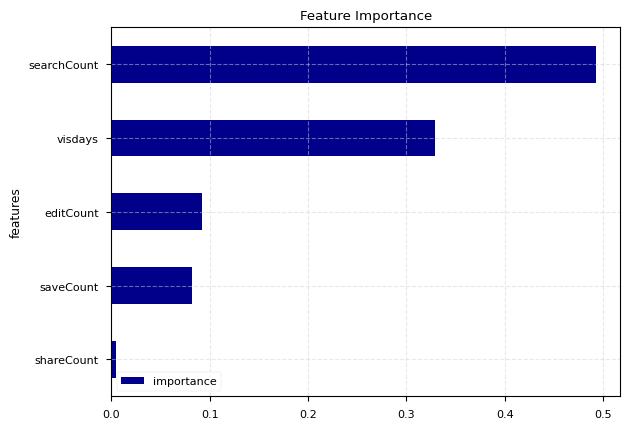

In [59]:
mask = grid_search_tree.best_estimator_.named_steps['feature_selection'].get_support()
feature_importance = grid_search_tree.best_estimator_.named_steps['model'].feature_importances_

features_list = list(X_train.columns.values)

selected_features = []
for bool, features in zip(mask, features_list):
    if bool:
        selected_features.append(features)

# create a df        
feature_importance_pd = pd.DataFrame(list(zip(selected_features, feature_importance)),\
                                    columns=['features', 'importance'])\
                          .set_index("features").sort_values("importance")

# visiual
feature_importance_pd.plot(kind='barh', color='darkblue')

plt.title("Feature Importance")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

**Q)  RFE (recursive feature elimination)**
- Backward 방식중 하나로 모든 변수를 다 포함시키고 반복해서 학습을 하면서 중요하지 않은 변수를 하나씩 제거하는 방식
    - [API DOC](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)
- 위 방식을 이용해서 원하는 모델을 이용해 Feature Selection(elimination)을 해보세요. 

In [60]:
## RFE (Recursive Feature Elimination)
# short ver.
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

svm = LinearSVC()
rfe = RFE(svm, n_features_to_select=1)
rfe = rfe.fit(X_train, y_train)

print(X.columns.tolist())
print(rfe.support_)
print(rfe.ranking_)

['viewCount', 'editCount', 'shareCount', 'searchCount', 'add', 'move', 'rename', 'adddir', 'visdays', 'saveCount', 'traffic']
[False False False False False False False False  True False False]
[ 5  8  4  2 10  3  7  9  1  6 11]


In [61]:
# pipeline ver.
def pipeline_lm_rfe(X_train, y_train):

    scaler = StandardScaler()
    lm = LogisticRegression()
    select = RFE(lm, n_features_to_select=1) 
    
    pipe = Pipeline([('feature_selection', select), ('scaler', scaler), ('model', lm)])

    param_grid = [{'model__C': [0.01, 1], 
                  'model__penalty': ['l1', 'l2']
                  }]

    grid_search = GridSearchCV(pipe, param_grid, cv=2)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [62]:
grid_search_rfe = pipeline_lm_rfe(X_train, y_train)

In [63]:
evaluation(grid_search_rfe, X_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83     39338
           1       0.62      0.70      0.66     18358

    accuracy                           0.77     57696
   macro avg       0.74      0.75      0.74     57696
weighted avg       0.78      0.77      0.77     57696

best score:  0.7698165095211684
best params:  {'model__C': 0.01, 'model__penalty': 'l2'}


0.7374034795383927

In [64]:
print(X_train.columns.tolist())
print(grid_search_rfe.best_estimator_.named_steps['feature_selection'].support_)
print(grid_search_rfe.best_estimator_.named_steps['feature_selection'].ranking_)

['viewCount', 'editCount', 'shareCount', 'searchCount', 'add', 'move', 'rename', 'adddir', 'visdays', 'saveCount', 'traffic']
[False False False False False False False False  True False False]
[ 6 10  4  2  9  3  5  8  1  7 11]


**Q) Random Forest, SVM이나 NB, Neural Network 등 다른 모델도 파이프라인에 사용해보세요.**
```python
# KNN
from sklearn.neighbors import KNeighborsClassifier

params_grid = [{'n_neighbors': [3, 5, 10], # default: 5
                'metric': ['euclidean', 'manhattan']
                # cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’
               }]

# SVC
from sklearn.svm import SVC

params_grid = [{'C': [1, 10], # Penalty parameter C of the error term
                'gamma': [1, 10] # Higher the value of gamma, will try to exact fit
                'kernel': ['linear', 'rbf']
               }]

# neural_network
from sklearn.neural_network import MLPClassifier

params_grid = [{'solver': [1, 10],
                'hidden_layer_sizes': [(5,2), (3,3)]
               }]

```

In [65]:
from sklearn.neural_network import MLPClassifier

def pipeline_nn(X_train, y_train):

    select = SelectKBest(score_func=f_classif) # if regression problem, score_func=f_regression
    scaler = MinMaxScaler()
    mlp = MLPClassifier()

    pipe = Pipeline([('scaler', scaler), ('feature_selection', select), ('model', mlp)])

    param_grid = [{'feature_selection__k': [5,7],
                  'model__solver': ['sgd', 'adam'],
                  'model__hidden_layer_sizes': [(5,2), (3,3)]
                  }]

    grid_search = GridSearchCV(pipe, param_grid, cv=2)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [66]:
grid_search_nn = pipeline_nn(X_train, y_train)

In [67]:
evaluation(grid_search_nn, X_test, y_test)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     39219
           1       0.75      0.84      0.79     18477

    accuracy                           0.86     57696
   macro avg       0.84      0.85      0.84     57696
weighted avg       0.87      0.86      0.86     57696

best score:  0.8623128119800333
best params:  {'feature_selection__k': 7, 'model__hidden_layer_sizes': (5, 2), 'model__solver': 'adam'}


0.8360332747603343